In [13]:
# Подключаем модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Настаиваем графику
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

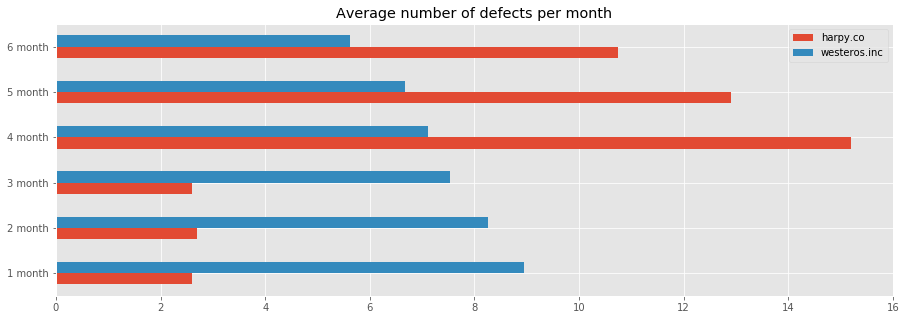

In [20]:
# Загружаем файл в DataFrame
pdata = pd.read_csv('Downloads\production-data.csv', delimiter=',')
# Формируем новый столбец
pdata['new'] = pdata['report.date'] - pdata['production.date']
# Сгруппировали по столбцам
gb = pdata.groupby(['supplier', 'new'])['defects']
gb = gb.mean()
# Получаем два вектора
harp_co = np.array(gb['harpy.co'][1:])
west_inc = np.array(gb['westeros.inc'][1:])
# Получили массив и транспонировали
d = (np.array([harp_co, west_inc])).transpose()
# Превратили массив в DataFrame
df = pd.DataFrame(data=d)
# Подготовили надписи
rvals = ['1 month', '2 month', '3 month', '4 month', '5 month', '6 month']
# Назвали колонки в DataFrame
df.columns = ['harpy.co', 'westeros.inc']
# Готовы постоить график определённого вида
ax = df.plot(kind='barh', stacked=False)
# Подписи
ax.set_yticklabels(rvals)
# Интервал на оси абсцисс
ax.set_xlim([0, 16])
# Подпись сверху
plt.title('Average number of defects per month')
# Показали график
plt.show()

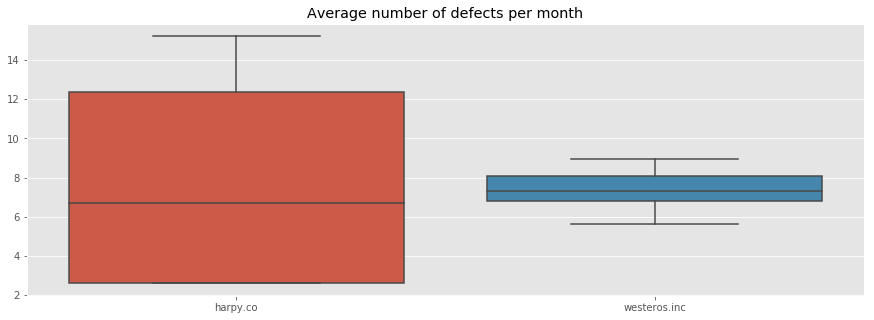

In [21]:
# Создали словарь
d = {'harpy.co': harp_co, 'westeros.inc': west_inc}
# Запихнули в DataFrame
df = pd.DataFrame(data=d)
# Приготовили заголовок
plt.title('Average number of defects per month')
# Загнали данные в "ящик с усами" (диаграмма размаха)
sns.boxplot(data=df)
# Показали диаграмму
plt.show()

In [23]:
# Объявляем и инициализируем нулями DataFrame
sum_def_harp = np.zeros(6)
sum_def_west = np.zeros(6)
test_harp = np.zeros(6)
test_west = np.zeros(6)

# Считали csv в DataFrame
pdata = pd.read_csv('Downloads\production-data.csv', delimiter=',', header=None)
# Сформировали массив
pdata = np.array(pdata[1:])
# Получили размерность массива
n, m = np.shape(pdata)
# Запустили итератор от 0 до (n-1), формуруем два массива, определяем сколько мечи не ломаются
for i in range(n):
    tmp_1 = float(pdata[i, 3]) - float(pdata[i, 4])
    tmp_2 = tmp_1 * (8 - float(pdata[i, 2]))
    if pdata[i, 5] == 'harpy.co':
        for j in range(6):
            if int(pdata[i, 1]) == j + 1:
                test_harp[j] += tmp_1
                sum_def_harp[j] += tmp_2
    if pdata[i, 5] == 'westeros.inc':
        for j in range(6):
            if int(pdata[i, 1]) == j + 1:
                test_west[j] += tmp_1
                sum_def_west[j] += tmp_2


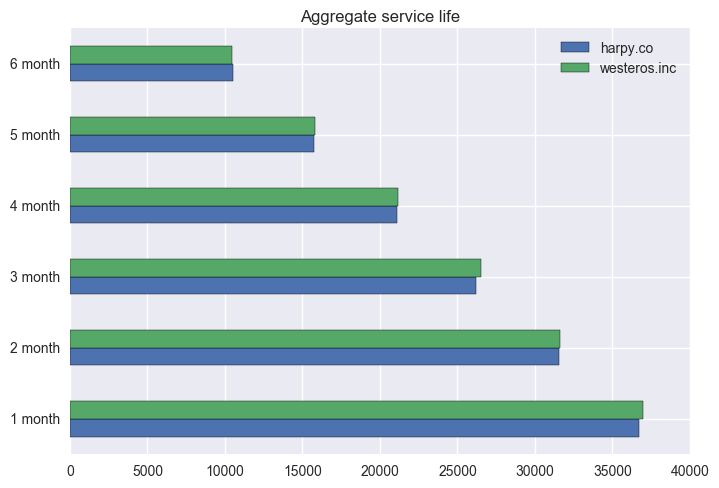

In [5]:
# Аналогично спроили предыдущий график
d = (np.array([sum_def_harp, sum_def_west])).transpose()
df = pd.DataFrame(data=d)
rvals = ['1 month', '2 month', '3 month', '4 month', '5 month', '6 month']
df.columns = ['harpy.co', 'westeros.inc']
ax = df.plot(kind='barh', stacked=False)
ax.set_yticklabels(rvals)
ax.set_xlim([0, 40000])
plt.title('Aggregate service life')
plt.show()


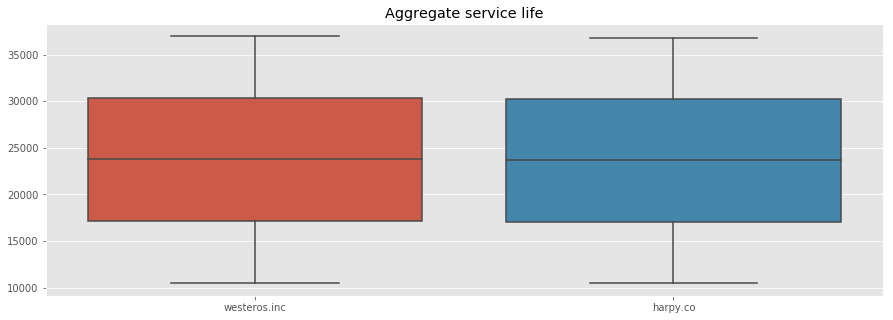

In [36]:
# Аналогично подстроенной выше диаграмме
plt.title('Aggregate service life')
d = {'westeros.inc': sum_def_west, 'harpy.co': sum_def_harp}
df = pd.DataFrame(data=d)
sns.boxplot(data=df)
plt.show()


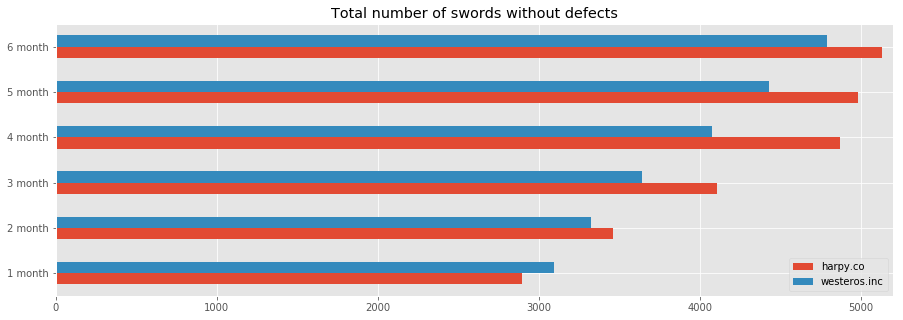

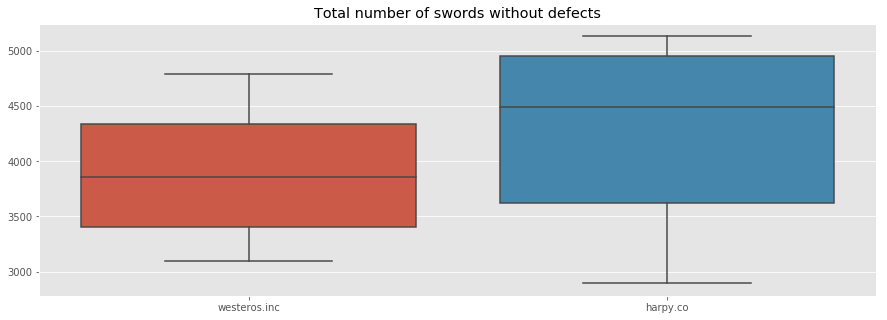

In [47]:
# Формируем графики, на которых количество мечей без дефектов, формарование графиков аналогично
d = (np.array([test_harp, test_west])).transpose()
df = pd.DataFrame(data=d)
df.columns = ['harpy.co', 'westeros.inc']
ax=df.plot(kind='barh', stacked=False)
ax.set_yticklabels(rvals)
ax.set_xlim([0,5200])
plt.title('Total number of swords without defects')
plt.show()

plt.title('Total number of swords without defects')
d = {'westeros.inc': test_west, 'harpy.co': test_harp}
df = pd.DataFrame(data=d)
sns.boxplot(data=df)
plt.show()
